In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('df_full.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df[df['transactionRevenue'] > 0]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 13 to 85390
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channelGrouping       928 non-null    object 
 1   date                  928 non-null    int64  
 2   fullVisitorId         928 non-null    object 
 3   socialEngagementType  928 non-null    object 
 4   visitNumber           928 non-null    int64  
 5   visitStartTime        928 non-null    int64  
 6   browser               928 non-null    object 
 7   operatingSystem       928 non-null    object 
 8   isMobile              928 non-null    bool   
 9   deviceCategory        928 non-null    object 
 10  continent             928 non-null    object 
 11  subContinent          928 non-null    object 
 12  country               928 non-null    object 
 13  region                928 non-null    object 
 14  metro                 928 non-null    object 
 15  city                

In [5]:
df = df.drop(['fullVisitorId', 'transactions', 'total_transactions'], axis=1)

In [6]:
categorical_feat = ['channelGrouping', 'socialEngagementType', 'browser', 'operatingSystem', 
                    'deviceCategory', 'continent', 'subContinent', 'country', 'region', 'metro',
                   'city', 'networkDomain', 'campaign', 'source', 'medium', 'keyword', 'referralPath', 'isTrueDirect']

In [7]:
for feature in categorical_feat:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(list(df[feature].values.astype('str')))
    df[feature] = label_encoder.transform(list(df[feature].values.astype('str'))) 
    print("for this feature : {0} label-encoding was done succesfully".format(feature))

for this feature : channelGrouping label-encoding was done succesfully
for this feature : socialEngagementType label-encoding was done succesfully
for this feature : browser label-encoding was done succesfully
for this feature : operatingSystem label-encoding was done succesfully
for this feature : deviceCategory label-encoding was done succesfully
for this feature : continent label-encoding was done succesfully
for this feature : subContinent label-encoding was done succesfully
for this feature : country label-encoding was done succesfully
for this feature : region label-encoding was done succesfully
for this feature : metro label-encoding was done succesfully
for this feature : city label-encoding was done succesfully
for this feature : networkDomain label-encoding was done succesfully
for this feature : campaign label-encoding was done succesfully
for this feature : source label-encoding was done succesfully
for this feature : medium label-encoding was done succesfully
for this feat

## Get dummies

In [8]:
X = df.drop(columns='transactionRevenue', axis = 1)
y = np.log1p(df['transactionRevenue'].fillna(0).astype(float))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

## Standardize

In [10]:
#Call the StandardScaler`s fit method
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [11]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectFromModel(RandomForestRegressor(n_estimators=1000), max_features=5)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
y_pred = model.predict(X_test_fs)

In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.493512124265167
MAE:  0.9422868853853098
r2 Score:  0.0916666313377128


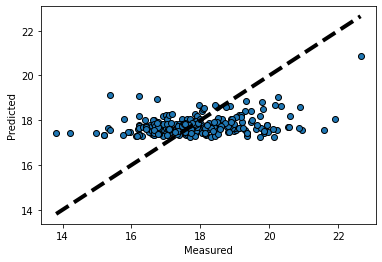

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Decision Tree

In [15]:
model = DecisionTreeRegressor()

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
               'splitter': ['best', 'random']}

In [16]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=False, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='poisson', max_depth=20, max_features='auto',
                      min_samples_leaf=20, min_samples_split=100,
                      splitter='random')


In [17]:
y_pred = dt_random.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.5366556333691346
MAE:  0.9539116214804014
r2 Score:  0.06542734722102017


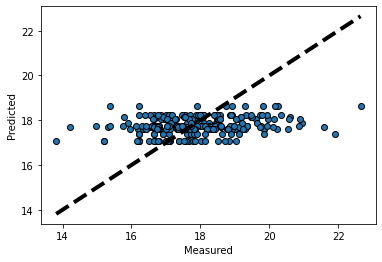

In [19]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Random Forest Regession

In [20]:
model = RandomForestRegressor()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'mae']}


In [21]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=False, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=3, n_estimators=45)


In [22]:
y_pred = rf_random.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.4612410189037155
MAE:  0.9323772706566411
r2 Score:  0.11129347022785263


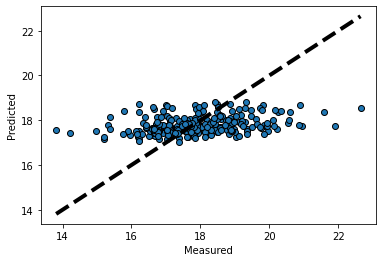

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Gradient Boosting Regession

In [25]:
model = GradientBoostingRegressor()

parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
               'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['friedman_mse', 'mse', 'mae']}

In [26]:
gb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", gb_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(criterion='mse', learning_rate=0.3, loss='huber',
                          max_depth=150, max_features='log2',
                          min_samples_leaf=100, min_samples_split=250,
                          n_estimators=15)


In [27]:
y_pred = gb_random.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.4228088125981972
MAE:  0.9241534364805497
r2 Score:  0.13466740529770782


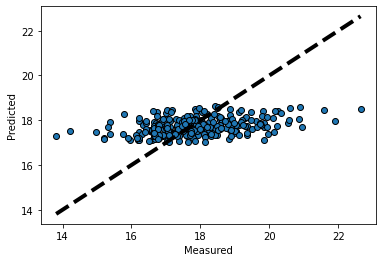

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## MLPRegressor

In [30]:
model = MLPRegressor(max_iter=100)

parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [31]:
mlp_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 5, 
                               random_state=42, n_jobs = -1)
mlp_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mlp_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPRegressor(activation='logistic', alpha=0.001, max_iter=100, solver='sgd')


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
y_pred = mlp_random.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.437081506551327
MAE:  0.9294257997441909
r2 Score:  0.12598695070500676


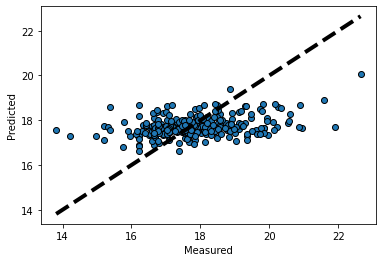

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Decision Tree Regressor With PCA

In [41]:
model = DecisionTreeRegressor()

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
               'splitter': ['best', 'random']}

In [42]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='poisson', max_depth=25, max_features='log2',
                      min_samples_leaf=100, min_samples_split=100)


In [43]:
y_pred = dt_random.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.5856448413408986
MAE:  0.969035286245392
r2 Score:  0.03563279009482101


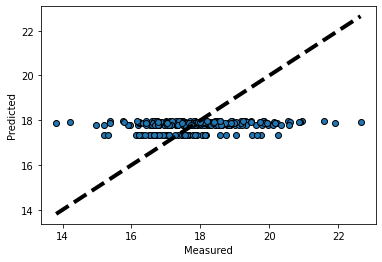

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Random Forest Regession With PCA

In [46]:
model = RandomForestRegressor()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'mae']}


In [47]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=3, n_estimators=45)


In [48]:
y_pred = rf_random.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.474363011311871
MAE:  0.9441149307443493
r2 Score:  0.1033128563620459


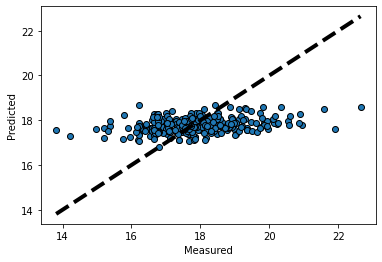

In [50]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Gradient Boosting Regession With PCA

In [51]:
model = GradientBoostingRegressor()

parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
               'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['friedman_mse', 'mse', 'mae']}

In [52]:
gb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", gb_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(criterion='mse', learning_rate=0.3, loss='huber',
                          max_depth=150, max_features='log2',
                          min_samples_leaf=100, min_samples_split=250,
                          n_estimators=15)


In [53]:
y_pred = gb_random.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.4970755680616605
MAE:  0.9439508737030734
r2 Score:  0.08949939422251352


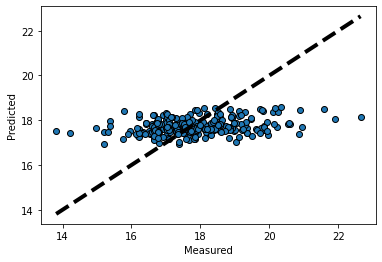

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## MLPRegressor With PCA

In [56]:
model = MLPRegressor(max_iter=100)

parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [57]:
mlp_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 5, 
                               random_state=42, n_jobs = -1)
mlp_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mlp_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPRegressor(activation='logistic', alpha=0.001, max_iter=100, solver='sgd')


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
y_pred = mlp_random.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  1.447207837795226
MAE:  0.9351644027082673
r2 Score:  0.11982825642893136


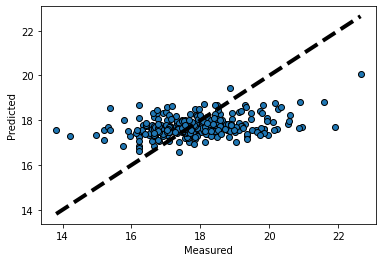

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Best Model Selection